In [1]:
import pickle
import krstc_utils as kutils
import pandas as pd
import matplotlib.pyplot as plt
from pywt import downcoef


In [2]:
svm = pickle.load(open('/global/homes/f/fnafis/gem/APSVMDataCleaning/test/svm.sav', 'rb'))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
df, runtime = kutils.load_dsp(run=40, verbose=False)
df

,trapEmax,tp_0,stp_20,trapEmax_cal_keV,pulse_rise_time_ns,run,cycle,runtime_s
0,405.406647,39000.0,39900.0,174.862259,900.0,40,2604,45.146393
1,658.550903,39350.0,39930.0,283.967438,580.0,40,2604,45.146393
2,963.140991,39600.0,39940.0,415.245758,340.0,40,2604,45.146393
3,637.465515,39310.0,39920.0,274.879608,610.0,40,2604,45.146393
4,293.327393,39390.0,39820.0,126.556107,430.0,40,2604,45.146393
...,...,...,...,...,...,...,...,...
52437,5763.690430,39710.0,40350.0,2484.282715,640.0,40,2640,728.240316
52438,748.901123,39660.0,39930.0,322.908356,270.0,40,2640,728.240316
52439,1744.650513,39490.0,40130.0,752.076355,640.0,40,2640,728.240316
52440,523.970337,39530.0,39910.0,225.963211,380.0,40,2640,728.240316


In [12]:
wfs = kutils.get_raw_wfs(df[(df.trapEmax_cal_keV>0) & (df.trapEmax_cal_keV<6)], nwfs=100, plot=False)

       trapEmax_cal_keV     tp_0  run  cycle  run  cycle  run  cycle
27046          5.027540  38670.0   40   2631   40   2631   40   2631
17077          5.384912  38310.0   40   2633   40   2633   40   2633
86375          5.441343  37300.0   40   2613   40   2613   40   2613
8599           5.076731  38890.0   40   2625   40   2625   40   2625
26872          5.242862  38580.0   40   2608   40   2608   40   2608
...                 ...      ...  ...    ...  ...    ...  ...    ...
10972          4.844932  37430.0   40   2635   40   2635   40   2635
35335          5.456105  37590.0   40   2626   40   2626   40   2626
10959          5.328958  37410.0   40   2622   40   2622   40   2622
90766          5.713031  37470.0   40   2632   40   2632   40   2632
84831          5.708128  37520.0   40   2608   40   2608   40   2608

[100 rows x 8 columns]




# svm classifier

https://github.com/nfuad041/gem/blob/master/APSVMDataCleaning/test/SVM.ipynb

In [13]:
def svm_classify(wfs, svm, wavelet_type='haar',level=5, plot=False, verbose=False):
    labels = []
    for wf in wfs:
        dwt = downcoef('a', wf, wavelet_type, level=level)
        dwt_normed = kutils.normalize_wf(dwt)
        label = svm.predict([dwt_normed])
        labels.append(label)
        if verbose:
            print(label)
        if plot:
            plt.plot(wf, label=label[-1].astype(int))
            plt.legend()

    # make labels one big array
    labels = [item for sublist in labels for item in sublist]
    return labels

labels = svm_classify(wfs, svm, plot=False, verbose=False)
labels

[12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
 array([ 0. ,  1.2,  2.4, ...,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

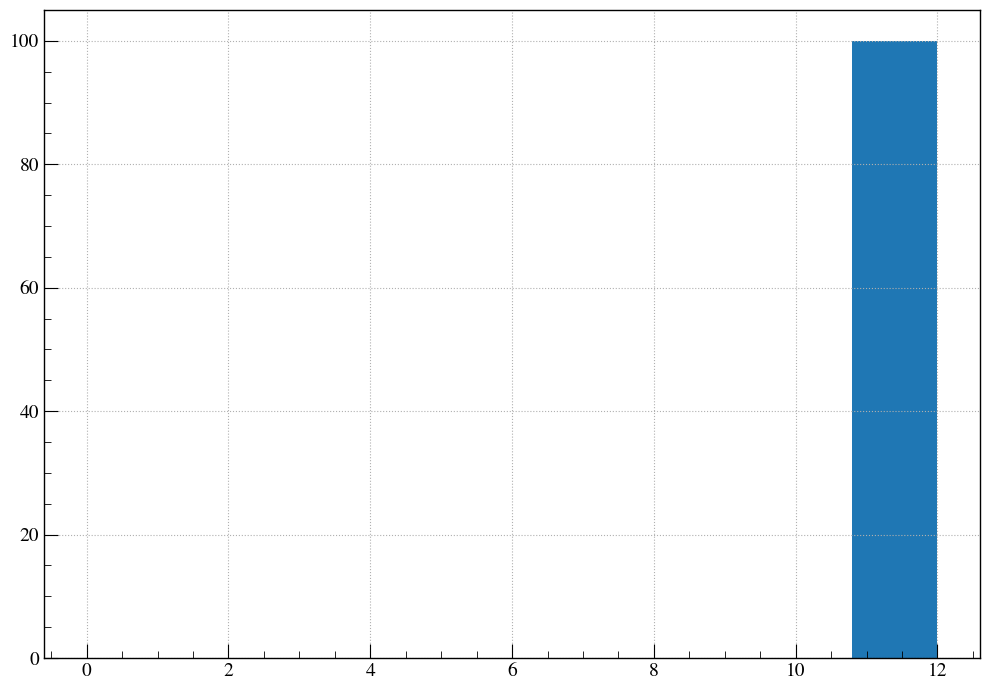

In [14]:
plt.hist(labels, range=(0,12))